In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1 / m) * (np.dot(Y, np.log(h)) + np.dot(1 - Y, np.log(1 - h)))
    return cost

# Gradient descent for logistic regression
def gradient_descent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    cost_history = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - Y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, Y, theta))

    return theta, cost_history


Final cost (alpha=0.1): 0.2291
Final parameters (theta): [ 0.32395465  2.38613663 -2.49462467]


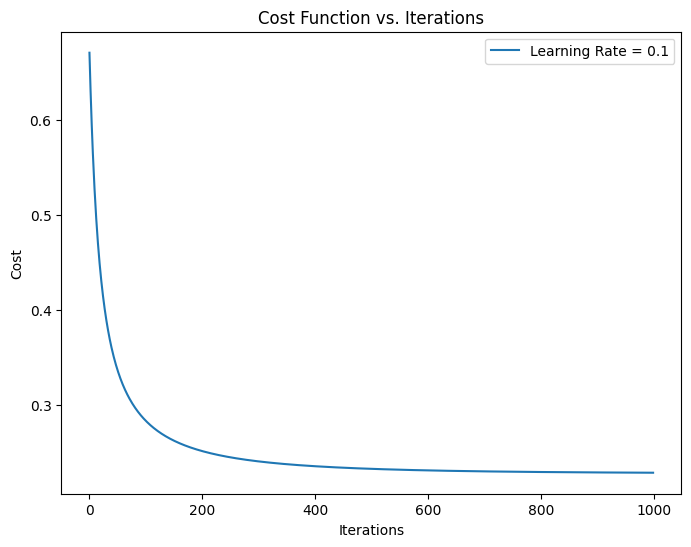

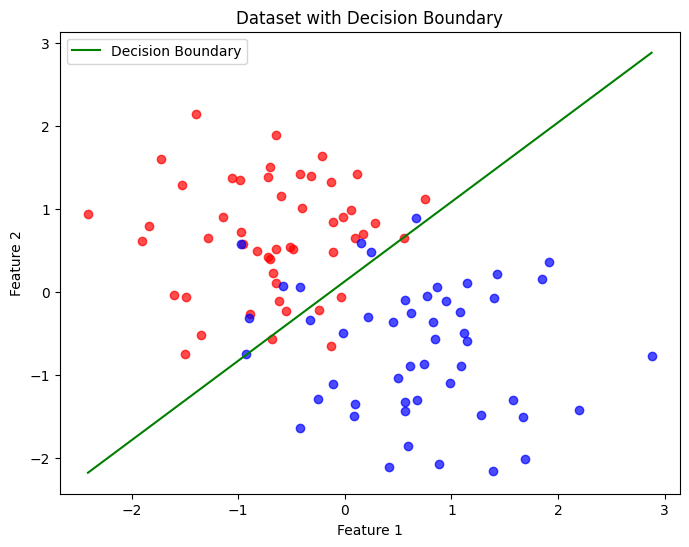

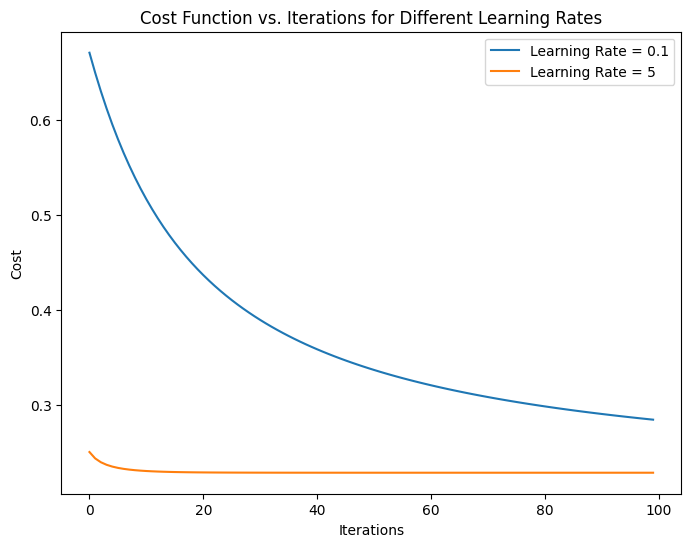

Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.8700
Precision: 0.8936
Recall: 0.8400
F1-Score: 0.8660


In [1]:
# Plot cost function vs iterations
def plot_cost(cost_history, label):
    plt.plot(range(len(cost_history)), cost_history, label=label)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()

# Plot dataset with decision boundary
def plot_decision_boundary(X, Y, theta):
    plt.figure(figsize=(8, 6))
    for i in range(len(Y)):
        color = 'r' if Y[i] == 0 else 'b'
        plt.scatter(X[i, 1], X[i, 2], c=color, alpha=0.7)

    x_boundary = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
    plt.plot(x_boundary, y_boundary, 'g', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Dataset with Decision Boundary')
    plt.show()

# Main code
# Load data
X = pd.read_csv("logisticX.csv", header=None).values
Y = pd.read_csv("logisticY.csv", header=None).values.flatten()

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize parameters
theta = np.zeros(X.shape[1])

# Task 1: Train logistic regression (alpha = 0.1)
alpha = 0.1
num_iters = 1000
theta_final, cost_history = gradient_descent(X, Y, theta, alpha, num_iters)
print(f"Final cost (alpha=0.1): {cost_history[-1]:.4f}")
print(f"Final parameters (theta): {theta_final}")

# Task 2: Plot cost function vs iterations
plt.figure(figsize=(8, 6))
plot_cost(cost_history, label="Learning Rate = 0.1")
plt.title("Cost Function vs. Iterations")
plt.show()

# Task 3: Plot dataset with decision boundary
plot_decision_boundary(X, Y, theta_final)

# Task 4: Compare learning rates
alpha_1 = 0.1
alpha_2 = 5
num_iters = 100

# Train for alpha=0.1
_, cost_history_1 = gradient_descent(X, Y, np.zeros(X.shape[1]), alpha_1, num_iters)

# Train for alpha=5
_, cost_history_2 = gradient_descent(X, Y, np.zeros(X.shape[1]), alpha_2, num_iters)

# Plot both cost histories
plt.figure(figsize=(8, 6))
plot_cost(cost_history_1, label="Learning Rate = 0.1")
plot_cost(cost_history_2, label="Learning Rate = 5")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.show()

# Task 5: Confusion matrix and metrics
predictions = (sigmoid(np.dot(X, theta_final)) >= 0.5).astype(int)
conf_matrix = confusion_matrix(Y, predictions)
accuracy = accuracy_score(Y, predictions)
precision = precision_score(Y, predictions)
recall = recall_score(Y, predictions)
f1 = f1_score(Y, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
